In [4]:
import pandas as pd
import seaborn as sns

In [2]:
airline = pd.read_csv("/home/ec2-user/flightdata.csv")

In [3]:
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
airline.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [49]:
airlines_cancellation = pd.DataFrame(airline.groupby("UniqueCarrier")['Cancelled'].sum()).reset_index()


In [50]:
airlines_cancellation

,UniqueCarrier,Cancelled
0,9E,2121
1,AA,1657
2,AQ,25
3,AS,355
4,B6,211
5,CO,193
6,DL,1534
7,EV,1739
8,F9,55
9,FL,533


In [59]:
airlines_delay = pd.DataFrame(airline.groupby("UniqueCarrier")['WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay'].sum()).reset_index()


In [60]:
airlines_delay

,UniqueCarrier,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CarrierDelay
0,9E,25926.0,131584.0,244.0,251803.0,239717.0
1,AA,34819.0,318236.0,625.0,340803.0,239637.0
2,AQ,312.0,339.0,82.0,3970.0,5871.0
3,AS,4215.0,41526.0,744.0,71112.0,45699.0
4,B6,564.0,67396.0,191.0,85122.0,41233.0
5,CO,11232.0,144370.0,1217.0,83878.0,69119.0
6,DL,31949.0,211454.0,231.0,163506.0,163869.0
7,EV,106084.0,145560.0,595.0,55985.0,375907.0
8,F9,2385.0,55081.0,247.0,29764.0,51527.0
9,FL,9507.0,187581.0,0.0,302263.0,79138.0


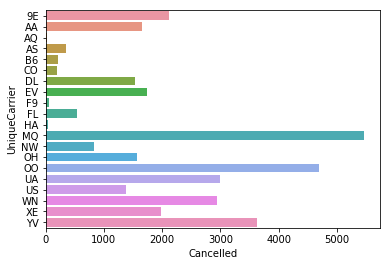

In [53]:
sns.barplot(data = airlines_cancellation, x = 'Cancelled', y = 'UniqueCarrier')

In [54]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=airlines_cancellation['Cancelled'], x = airlines_cancellation['UniqueCarrier'])],
    layout_title_text="airlines cancellation by carrier"
)
fig.show()

In [55]:
from bokeh.io import show, output_notebook
from bokeh.models import CategoricalColorMapper, ColumnDataSource, FactorRange
from bokeh.plotting import figure, output_file

p = figure(x_range=airlines_cancellation['UniqueCarrier'], plot_height=250, toolbar_location=None, title="airlines cancellation")
p.vbar(x=airlines_cancellation['UniqueCarrier'], top = airlines_cancellation["Cancelled"], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
output_notebook()
show(p)

Loading BokehJS ...

In [73]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['CarrierDelay'],
    name='CarrierDelay',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['WeatherDelay'],
    name='WeatherDelay',
    marker_color='mediumpurple'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['NASDelay'],
    name='NASDelay',
    marker_color='limegreen'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['LateAircraftDelay'],
    name='LateAircraftDelay',
    marker_color='navy'
))
fig.add_trace(go.Bar(
    x=airlines_delay['UniqueCarrier'],
    y=airlines_delay['SecurityDelay'],
    name='SecurityDelay',
    marker_color='cyan'
))
fig.update_layout(barmode='relative', title_text='Delays')